# Import Labriaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import JSON
from googleapiclient.discovery import build
import os
import pathlib
import re
notebook_path = os.getcwd()

# Functions for YouTube data API

In [2]:
'''
Function to read through the info of the channels and create a dataframe
METHOD: .channels().list()
'''

def get_channel_stats(youtube, channel_ids):
    data = []
    
    # create request
    request = youtube.channels().list(part="snippet,contentDetails,statistics", id=channel_ids)
    
    response = request.execute()

    # loop through the channel
    for item in response['items']:
        info = {'ChannelName': item['snippet']['title'],
                'Subscribers': item['statistics']['subscriberCount'],
                'TotalViews': item['statistics']['viewCount'],
                'Videos': item['statistics']['videoCount'],
                'PlaylistID': item['contentDetails']['relatedPlaylists']['uploads'],   
               
               }
        data.append(info)
    return(pd.DataFrame(data))


'''
Function to create a list of the video IDs of a PlaylistID
METHOD: .playlistItems().list()
'''

def get_videoIDs(youtube, playlistID):
    video_IDs = []   
    
    request = youtube.playlistItems().list(part="snippet, contentDetails", playlistId=playlistID, maxResults=50) #maximum value by default
    response = request.execute()

     # loop through the items
    for item in response['items']:
        video_IDs.append(item['contentDetails']['videoId'])
                        
    next_page_token = response.get('nextPageToken')
    
    while next_page_token is not None:
        request = youtube.playlistItems().list(part="snippet, contentDetails", playlistId=playlistID, maxResults=50, pageToken=next_page_token) #maximum value by default
        response = request.execute()
    
     # loop through the items
        for item in response['items']:
            video_IDs.append(item['contentDetails']['videoId'])
        
        next_page_token = response.get('nextPageToken')

        
    return video_IDs


'''
Function to read through the each video of the channel and create a dataframe
METHOD: .channels().list()
'''

def get_video_details(youtube, VideoList): 
    data = []
    j = 0
    
    # Loop through the video list in batches of 50
    while j < len(VideoList):
        # Create request
        request = youtube.videos().list(part="snippet,contentDetails,statistics", id=','.join(VideoList[j:j+50]))
        
        try:
            response = request.execute()
        except Exception as e:
            print(f"An error occurred: {e}")
            j += 50
            continue
    
        # Loop through the response items
        for item in response.get('items', []):
            info = {
                'VideoID': item['id'],
                'Date/Time': item['snippet']['publishedAt'],
                'Title': item['snippet']['title'],
                'Description': item['snippet']['description'],
                'Tags': item['snippet'].get('tags', []),   # Tags might not always be present
                'Duration': item['contentDetails']['duration'],
                'Definition': item['contentDetails']['definition'],
                'Caption': item['contentDetails']['caption'],
                'Views': item['statistics'].get('viewCount', None),  # Handle missing statistics
                'Likes': item['statistics'].get('likeCount', None),
                #'Favorite': item['statistics'].get('favoriteCount', None)
            }
            data.append(info)
        
        j += 50  # Increment by 50 to get the next batch of video IDs
        print(f"Processed up to video index: {j}")
    
    # Convert the collected data into a DataFrame
    return pd.DataFrame(data)
    
    # Print the DataFrame to verify
    display(df)
    print(f"Total videos processed: {len(df)}")

# Retrieve Youtube data

## Read API key

In [3]:
file = open('API_key.txt')
api_key = file.read()
#api_key

## Import channel IDs

In [4]:
channel_ids = ['UC9HGzFGt7BLmWDqooUbWGBg', #Matthew ID
               'UCYqdbnuvx-jJZByotoNW-5Q', # Apollonia
              ]

## Build API client

In [5]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=api_key)

## Retrieve channel info/statistics | .channels() Method

In [6]:
df = get_channel_stats(youtube, channel_ids)
df

,ChannelName,Subscribers,TotalViews,Videos,PlaylistID
0,Apollonia Ponti,682000,105424181,1044,UUYqdbnuvx-jJZByotoNW-5Q
1,Matthew Hussey,3050000,541687542,942,UU9HGzFGt7BLmWDqooUbWGBg


## Retrieve video lists  |  .playlistItems() Method

In [7]:
# retrieve video list for Matthew
playlistID = df.loc[df['ChannelName'] == 'Matthew Hussey', 'PlaylistID'].iloc[0]
VideoList_mat = get_videoIDs(youtube, playlistID) 

# retrieve video list for Apollonia
playlistID = df.loc[df['ChannelName'] == 'Apollonia Ponti', 'PlaylistID'].iloc[0]
VideoList_apo = get_videoIDs(youtube,  playlistID) 
#VideoList_mat

## Retrieve video info and statistics  |  .videos() Method

### Build dataframe

In [8]:
video_mat = get_video_details(youtube, VideoList_mat)
video_apo = get_video_details(youtube, VideoList_apo)

Processed up to video index: 50
Processed up to video index: 100
Processed up to video index: 150
Processed up to video index: 200
Processed up to video index: 250
Processed up to video index: 300
Processed up to video index: 350
Processed up to video index: 400
Processed up to video index: 450
Processed up to video index: 500
Processed up to video index: 550
Processed up to video index: 600
Processed up to video index: 650
Processed up to video index: 700
Processed up to video index: 750
Processed up to video index: 800
Processed up to video index: 850
Processed up to video index: 900
Processed up to video index: 950
Processed up to video index: 50
Processed up to video index: 100
Processed up to video index: 150
Processed up to video index: 200
Processed up to video index: 250
Processed up to video index: 300
Processed up to video index: 350
Processed up to video index: 400
Processed up to video index: 450
Processed up to video index: 500
Processed up to video index: 550
Processed up

In [9]:
print()
print()
print('Dataframe Matthew')
print('---------------------------------------------------------------------------------------------------')
display(video_mat)
print()
print()
print('Dataframe Apollonia')
print('---------------------------------------------------------------------------------------------------')
display(video_apo)



Dataframe Matthew
---------------------------------------------------------------------------------------------------


,VideoID,Date/Time,Title,Description,Tags,Duration,Definition,Caption,Views,Likes
0,L5l_X4TXrZ8,2024-05-19T11:45:01Z,"How To AVOID Dating ""Players""","►► Get Vulnerable Stories, Real Insights, and ...","[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT19M53S,hd,false,20639,795
1,JgKATVJUY7A,2024-05-15T17:34:12Z,Stop These Insecure Dating Behaviors! - w/ Sab...,"►► Get Vulnerable Stories, Real Insights, and ...","[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT54M46S,hd,false,18200,660
2,ZQ13ZgSJwic,2024-05-15T15:00:36Z,"The Problem With Pretending We're ""Fine""",The toll pretending “we’re fine” takes on us c...,"[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT1M,hd,false,20266,1511
3,nHqyyt66dQk,2024-05-12T12:05:06Z,THIS Is the Most Dangerous Moment in Dating......,"►► Get Vulnerable Stories, Real Insights and P...","[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT12M50S,hd,false,62676,2538
4,l_Cjd2ya5R0,2024-05-11T15:00:42Z,Attracted to the Wrong People?,Why is it that we're drawn to people who treat...,"[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT59S,hd,false,69013,5038
...,...,...,...,...,...,...,...,...,...,...
938,ndra_xByibg,2010-07-21T09:02:05Z,How To Flirt With A Guy - Surefire Tips For Wo...,►► Confused about what to text him? Just copy ...,"[flirting tips for women, flirting with men, f...",PT2M38S,hd,false,1880224,10227
939,zkqYk2rJogs,2010-07-21T08:10:50Z,Powerful Conversational Flirting Tips For Wome...,►► Confused about what to text him? Just copy ...,"[flirting tips for women, flirting, flirting a...",PT2M13S,hd,false,923861,4294
940,osLuZa7SvDw,2010-07-16T11:51:38Z,The Best Places To Go On A Date - Avoid Gettin...,►► Confused about what to text him? Just copy ...,"[places to go on a date, dating advice, matthe...",PT1M50S,hd,false,171262,1216
941,RJe_C-iF3Bk,2010-07-15T17:43:41Z,How To Tell If A Guy Likes You Instantly - Pro...,►► Confused About Why Men Disappear? My FREE g...,"[how to tell if a guy likes you, how to know i...",PT1M32S,hd,false,2799447,13832




Dataframe Apollonia
---------------------------------------------------------------------------------------------------


,VideoID,Date/Time,Title,Description,Tags,Duration,Definition,Caption,Views,Likes
0,5Y0nNvCkSrI,2024-05-20T13:00:08Z,The #1 Trap You Fall Into When Seeking Validat...,Subscribe Here: https://www.youtube.com/c/Apol...,"[shorts, shorts video, youtube shorts, dating,...",PT42S,hd,false,1690,74
1,UzmqwtC4TU8,2024-05-19T13:00:18Z,The Difference Between High Quality and Emotio...,Subscribe Here: https://www.youtube.com/c/Apol...,"[shorts, shorts video, youtube shorts, dating,...",PT39S,hd,false,2207,96
2,ojDaIZLIcz0,2024-05-18T13:00:46Z,Who Pays On The First Date? Watch This!,Subscribe Here: https://www.youtube.com/c/Apol...,"[shorts, shorts video, youtube shorts, dating,...",PT31S,hd,false,790,51
3,ybWnOmrEGN8,2024-05-15T16:00:55Z,Men With Broken Relationship With Their Mother...,"* 7-DAY FREE TRIAL ( APOLLONIA'S MEN""S MASTERY...","[dating advice for men, trauma, mother wound, ...",PT14M27S,hd,false,1868,161
4,ajIQ5KngR50,2024-05-15T13:00:05Z,The Truth On How To Make A Woman Miss You #shorts,Subscribe Here: https://www.youtube.com/c/Apol...,"[shorts, shorts video, youtube shorts, dating,...",PT1M,hd,false,3566,221
...,...,...,...,...,...,...,...,...,...,...
1040,mdza2ANvx4I,2017-12-19T15:15:32Z,Why Do I Dream So Much: Detect Signals Fast!,Why do I dream so much? I asked this question ...,"[why do i dream so much, dreams, what do dream...",PT4M39S,hd,false,52166,703
1041,ioKqqeURDyY,2017-12-14T22:02:26Z,How To Love: Why People Are Addicted to The Wr...,"HOW TO LOVE, is a big topic in this modern wor...","[How to love, addicted to love, how to love yo...",PT8M1S,hd,false,2742,118
1042,fnUmNM-ax2A,2017-12-13T01:04:05Z,How To Communicate in Relationships: 5 Tips To...,How to communicate in relationships is somethi...,"[how to communicate in relationships, communic...",PT7M42S,hd,false,9787,228
1043,gNEB21fANAc,2017-11-21T20:11:42Z,Signs She's Flirting With You! - Dating Advice...,FLIRTING CAN BE CONFUSING BUT NOT ANYMORE! In ...,"[flirting, how to flirt, flirting tips, relati...",PT2M59S,hd,false,9390,174


# Formatting and Structuring Dataframe
- nan values | unique values | type of values
- Format: Duration | Date & Time


## Functions for formatting and structuring

In [10]:
def convert_to_float(df, columns):
    '''
    Function to convert columns to float
    
        Args:
        - df (pd.DataFrame): Input DataFrame.
        - columns (list): List of columns to convert to float.
            
        Returns:
        - pd.DataFrame: Resulting DataFrame with converted columns.
        '''
    
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting errors to NaN
        df[col] = df[col].astype(float)  # Convert to float

'''
---------------------------------------------------------------------------
'''

def add_datetime_cols(df,col):
    '''
    Function to covert column to DateTime Format and add date and time columns
    
        Args:
        - df (pd.DataFrame): Input DataFrame.
        - column: String of the column to convert to DateTime Format.
            
        Returns:
        - pd.DataFrame: Resulting DataFrame with converted DateTime Format column with
                        new columns Date and Time.
        '''
    
    # Convert the 'datetime' column to a pandas datetime object
    df[col] = pd.to_datetime(df[col])
    
    # Create a new column for the date part
    df['Date'] = df[col].dt.date
    
    # Create a new column for the time part
    df['Time'] = df[col].dt.time

'''
---------------------------------------------------------------------------
'''

def iso8601_to_minutes(duration):
    '''
    Function to covert duration format iso8601 to total duration of minutes
    
        Args:
        - duration: string in duration format iso8601.
                    
        Returns:
        - total minutes: Resulting total duration in minutes.
    '''
    
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        seconds = int(match.group(3)) if match.group(3) else 0
        total_minutes = hours * 60 + minutes + seconds / 60
        return total_minutes
    else:
        return 0  # Default value when the duration string doesn't match the expected pattern



## Create Dataframe copy

In [45]:
mat_df = video_mat.copy()
apo_df = video_apo.copy()

## Formatting and restructuring

In [46]:
# add columns Date and Time
col = 'Date/Time'
add_datetime_cols(mat_df,col)
add_datetime_cols(apo_df,col)

In [47]:
#convert Duration to total minutes
mat_df['TotalDuration(min)'] = mat_df['Duration'].apply(iso8601_to_minutes)
apo_df['TotalDuration(min)'] = apo_df['Duration'].apply(iso8601_to_minutes)

In [48]:
# convert numerical columns to float numbers
num_col = ['Views',	'Likes', 'TotalDuration(min)']
convert_to_float(mat_df, num_col)
convert_to_float(apo_df, num_col)

In [49]:
mat_df['Month_Year'] = mat_df['Date/Time'].dt.to_period('M')
apo_df['Month_Year'] = apo_df['Date/Time'].dt.to_period('M')


C:\Users\salto\AppData\Local\Temp\ipykernel_1252\1109815071.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  mat_df['Month_Year'] = mat_df['Date/Time'].dt.to_period('M')
C:\Users\salto\AppData\Local\Temp\ipykernel_1252\1109815071.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  apo_df['Month_Year'] = apo_df['Date/Time'].dt.to_period('M')


## Restructured Dataframe

In [50]:
print()
print()
print('Dataframe Matthew')
print('---------------------------------------------------------------------------------------------------')
display(mat_df)
print()
print()
print('Dataframe Apollonia')
print('---------------------------------------------------------------------------------------------------')
display(apo_df)



Dataframe Matthew
---------------------------------------------------------------------------------------------------


,VideoID,Date/Time,Title,Description,Tags,Duration,Definition,Caption,Views,Likes,Date,Time,TotalDuration(min),Month_Year
0,L5l_X4TXrZ8,2024-05-19 11:45:01+00:00,"How To AVOID Dating ""Players""","►► Get Vulnerable Stories, Real Insights, and ...","[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT19M53S,hd,false,20639.0,795.0,2024-05-19,11:45:01,19.883333,2024-05
1,JgKATVJUY7A,2024-05-15 17:34:12+00:00,Stop These Insecure Dating Behaviors! - w/ Sab...,"►► Get Vulnerable Stories, Real Insights, and ...","[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT54M46S,hd,false,18200.0,660.0,2024-05-15,17:34:12,54.766667,2024-05
2,ZQ13ZgSJwic,2024-05-15 15:00:36+00:00,"The Problem With Pretending We're ""Fine""",The toll pretending “we’re fine” takes on us c...,"[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT1M,hd,false,20266.0,1511.0,2024-05-15,15:00:36,1.000000,2024-05
3,nHqyyt66dQk,2024-05-12 12:05:06+00:00,THIS Is the Most Dangerous Moment in Dating......,"►► Get Vulnerable Stories, Real Insights and P...","[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT12M50S,hd,false,62676.0,2538.0,2024-05-12,12:05:06,12.833333,2024-05
4,l_Cjd2ya5R0,2024-05-11 15:00:42+00:00,Attracted to the Wrong People?,Why is it that we're drawn to people who treat...,"[Matthew Hussey, Matt Hussey, Get The Guy, How...",PT59S,hd,false,69013.0,5038.0,2024-05-11,15:00:42,0.983333,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,ndra_xByibg,2010-07-21 09:02:05+00:00,How To Flirt With A Guy - Surefire Tips For Wo...,►► Confused about what to text him? Just copy ...,"[flirting tips for women, flirting with men, f...",PT2M38S,hd,false,1880224.0,10227.0,2010-07-21,09:02:05,2.633333,2010-07
939,zkqYk2rJogs,2010-07-21 08:10:50+00:00,Powerful Conversational Flirting Tips For Wome...,►► Confused about what to text him? Just copy ...,"[flirting tips for women, flirting, flirting a...",PT2M13S,hd,false,923861.0,4294.0,2010-07-21,08:10:50,2.216667,2010-07
940,osLuZa7SvDw,2010-07-16 11:51:38+00:00,The Best Places To Go On A Date - Avoid Gettin...,►► Confused about what to text him? Just copy ...,"[places to go on a date, dating advice, matthe...",PT1M50S,hd,false,171262.0,1216.0,2010-07-16,11:51:38,1.833333,2010-07
941,RJe_C-iF3Bk,2010-07-15 17:43:41+00:00,How To Tell If A Guy Likes You Instantly - Pro...,►► Confused About Why Men Disappear? My FREE g...,"[how to tell if a guy likes you, how to know i...",PT1M32S,hd,false,2799447.0,13832.0,2010-07-15,17:43:41,1.533333,2010-07




Dataframe Apollonia
---------------------------------------------------------------------------------------------------


,VideoID,Date/Time,Title,Description,Tags,Duration,Definition,Caption,Views,Likes,Date,Time,TotalDuration(min),Month_Year
0,5Y0nNvCkSrI,2024-05-20 13:00:08+00:00,The #1 Trap You Fall Into When Seeking Validat...,Subscribe Here: https://www.youtube.com/c/Apol...,"[shorts, shorts video, youtube shorts, dating,...",PT42S,hd,false,1690.0,74.0,2024-05-20,13:00:08,0.700000,2024-05
1,UzmqwtC4TU8,2024-05-19 13:00:18+00:00,The Difference Between High Quality and Emotio...,Subscribe Here: https://www.youtube.com/c/Apol...,"[shorts, shorts video, youtube shorts, dating,...",PT39S,hd,false,2207.0,96.0,2024-05-19,13:00:18,0.650000,2024-05
2,ojDaIZLIcz0,2024-05-18 13:00:46+00:00,Who Pays On The First Date? Watch This!,Subscribe Here: https://www.youtube.com/c/Apol...,"[shorts, shorts video, youtube shorts, dating,...",PT31S,hd,false,790.0,51.0,2024-05-18,13:00:46,0.516667,2024-05
3,ybWnOmrEGN8,2024-05-15 16:00:55+00:00,Men With Broken Relationship With Their Mother...,"* 7-DAY FREE TRIAL ( APOLLONIA'S MEN""S MASTERY...","[dating advice for men, trauma, mother wound, ...",PT14M27S,hd,false,1868.0,161.0,2024-05-15,16:00:55,14.450000,2024-05
4,ajIQ5KngR50,2024-05-15 13:00:05+00:00,The Truth On How To Make A Woman Miss You #shorts,Subscribe Here: https://www.youtube.com/c/Apol...,"[shorts, shorts video, youtube shorts, dating,...",PT1M,hd,false,3566.0,221.0,2024-05-15,13:00:05,1.000000,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,mdza2ANvx4I,2017-12-19 15:15:32+00:00,Why Do I Dream So Much: Detect Signals Fast!,Why do I dream so much? I asked this question ...,"[why do i dream so much, dreams, what do dream...",PT4M39S,hd,false,52166.0,703.0,2017-12-19,15:15:32,4.650000,2017-12
1041,ioKqqeURDyY,2017-12-14 22:02:26+00:00,How To Love: Why People Are Addicted to The Wr...,"HOW TO LOVE, is a big topic in this modern wor...","[How to love, addicted to love, how to love yo...",PT8M1S,hd,false,2742.0,118.0,2017-12-14,22:02:26,8.016667,2017-12
1042,fnUmNM-ax2A,2017-12-13 01:04:05+00:00,How To Communicate in Relationships: 5 Tips To...,How to communicate in relationships is somethi...,"[how to communicate in relationships, communic...",PT7M42S,hd,false,9787.0,228.0,2017-12-13,01:04:05,7.700000,2017-12
1043,gNEB21fANAc,2017-11-21 20:11:42+00:00,Signs She's Flirting With You! - Dating Advice...,FLIRTING CAN BE CONFUSING BUT NOT ANYMORE! In ...,"[flirting, how to flirt, flirting tips, relati...",PT2M59S,hd,false,9390.0,174.0,2017-11-21,20:11:42,2.983333,2017-11


# Dataframe first-order Statistics

## Functions for first-order Statistics

In [51]:
def aggregate_numerical_columns(df, numerical_columns, aggregations):
    """
    Apply aggregation functions to numerical columns of a DataFrame.

    Args:
    - df (pd.DataFrame): Input DataFrame.
    - numerical_columns (list): List of numerical columns to aggregate.
    - aggregations (list): List of aggregation functions to apply to each numerical column.
                           Example: ['sum', 'mean']

    Returns:
    - pd.DataFrame: Resulting DataFrame with aggregated values.
    """
    # Create a dictionary with the same aggregations for all numerical columns
    agg_dict = {col: aggregations for col in numerical_columns}

    # Apply the aggregation functions using agg
    result = df[numerical_columns].agg(agg_dict)
    return result



In [52]:
num_col = ['Views',	'Likes', 'TotalDuration(min)']
cat_col = ['Title',	'Description', 'TotalDuration(min)']

In [53]:
# Numerical columns
aggregations = ['sum', 'mean','median','quantile','min','max','count']

result_mat = aggregate_numerical_columns(mat_df, num_col, aggregations)
result_apo = aggregate_numerical_columns(apo_df, num_col, aggregations)

In [54]:
print()
print()
print('Statistics Matthew')
print('--------------------------------------------')
display(result_mat)
print()
print()
print('Statistics Apollonia')
print('--------------------------------------------')
display(result_apo)



Statistics Matthew
--------------------------------------------


,Views,Likes,TotalDuration(min)
sum,5.417324e+08,1.105105e+07,9763.500000
mean,5.744777e+05,1.171904e+04,10.353659
median,2.157270e+05,5.441000e+03,6.883333
quantile,2.157270e+05,5.441000e+03,6.883333
min,0.000000e+00,0.000000e+00,0.000000
max,2.118893e+07,1.647320e+05,113.483333
count,9.430000e+02,9.430000e+02,943.000000




Statistics Apollonia
--------------------------------------------


,Views,Likes,TotalDuration(min)
sum,1.054263e+08,2.438894e+06,10396.600000
mean,1.008864e+05,2.336105e+03,9.948900
median,1.521500e+04,5.745000e+02,7.166667
quantile,1.521500e+04,5.745000e+02,7.166667
min,0.000000e+00,4.000000e+00,0.000000
max,4.239368e+06,8.537300e+04,134.400000
count,1.045000e+03,1.044000e+03,1045.000000


# Plot statistics

## Functions for plotting

In [79]:
def plot_cumulative_data(data_tuples, **kwargs):
    """
    Plot the normalized cumulative values over time from specified columns of multiple dataframes.

    Parameters:
        data_tuples (list of tuples): List of tuples, where each tuple contains the date column and values column.
        **kwargs: Additional keyword arguments.

    Keyword Arguments:
        labels (list): List of labels for each dataset being plotted.

    Returns:
        None
    """
    # Create a figure
    plt.figure(figsize=(10, 6))

    labels = kwargs.get('labels', None)

    for i, (date_column, values_column) in enumerate(data_tuples):
        # Create a dataframe from the given columns
        df = pd.DataFrame({ 'Date': date_column, 'Values': values_column })

        # Sort the dataframe by date
        df_sorted = df.sort_values(by='Date')

        # Calculate cumulative values
        df_sorted['Cumulative_Values'] = df_sorted['Values'].cumsum()

        # Normalize cumulative values to the maximum value
        df_sorted['Cumulative_Values_Normalized'] = df_sorted['Cumulative_Values'] / df_sorted['Cumulative_Values'].max()

        # Plot the normalized cumulative values
        if labels and i < len(labels):
            label = labels[i]
        else:
            label = f'Dataset {i+1}'
        plt.plot(df_sorted['Date'], df_sorted['Cumulative_Values_Normalized'], label=label)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Normalized Count')
  
    # Create the title based on values_column labels
    #values_column_label = ', '.join([f'Dataset {i+1}: {values_column.name}' for i, (date_column, values_column) in enumerate(data_tuples)])
    plt.title(f'Normalized Cumulative {values_column.name} Over Time')
    
    plt.legend()

    # Show the plot
    plt.show()


def plot_monthly_values(data_tuples, values_column='Views', **kwargs):
    """
    Plots monthly values for multiple datasets.

    Parameters:
        data_tuples (list of tuples): List of tuples, where each tuple contains the Month_Year column from a dataframe
                                      and the corresponding values column.
        values_column (str): The column name containing the values to plot.
        **kwargs: Additional keyword arguments.

    Keyword Arguments:
        labels (list): List of labels for each dataset being plotted.
    """
    labels = kwargs.get('labels', [f'Dataset {i+1}' for i in range(len(data_tuples))])
    
    # Create a figure and a subplot
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (month_year, values_col) in enumerate(data_tuples):
        # Calculate monthly sums of values
        monthly_values = values_col.groupby(month_year)[values_column].sum().reset_index()
        
        # Plot values
        ax.bar(monthly_values['Month_Year'].astype(str), monthly_values[values_column], label=f'{labels[i]} {values_column}', alpha=0.7)
    
    # Customize subplot
    ax.set_title(f'{values_column.capitalize()} Over Time (Monthly)')
    ax.set_ylabel('Count')
    ax.set_ylim([0, ax.get_ylim()[1]])  # Adjust y-axis to provide some padding above the max value
    ax.legend()
    
    # Reduce number of x-ticks and rotate them
    ax.set_xticks(ax.get_xticks()[::6])  # Show every 6th month
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


## Plot data and first order statistics

## Plot Views and Likes over time

Channel Views over time
----------------------------------------------

Views over time
----------------------------------------------



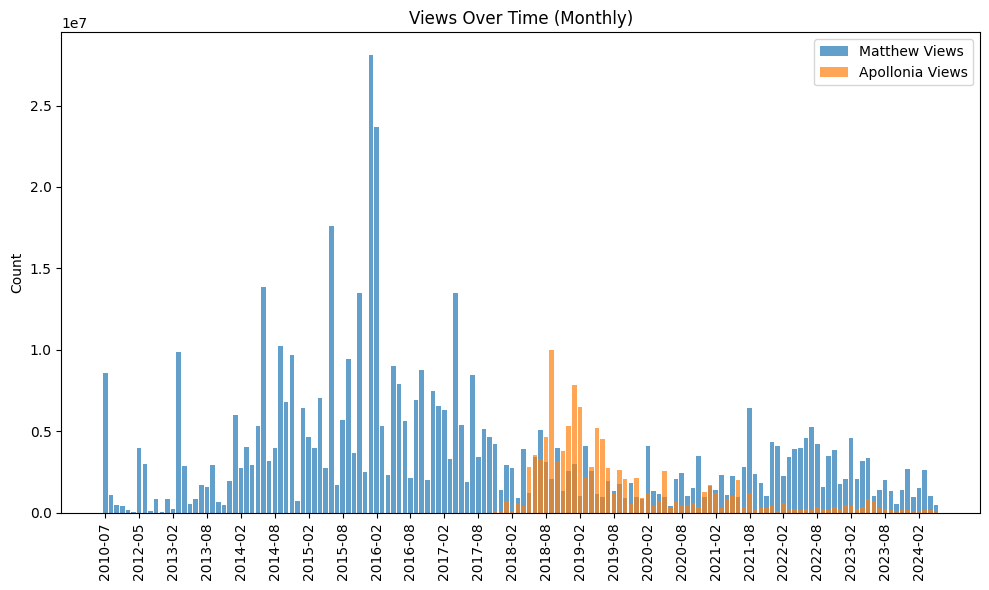


----------------------------------------------
Likes over time
----------------------------------------------



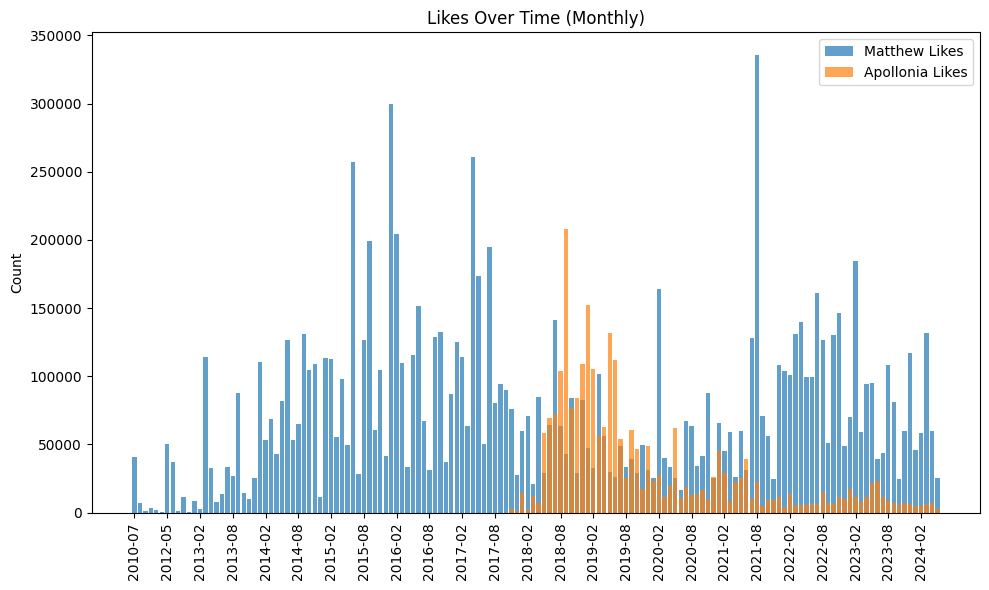

In [71]:
data_tuples = [(mat_df['Month_Year'], mat_df), (apo_df['Month_Year'], apo_df)]

print('Channel Views over time')
print('----------------------------------------------')
print()
print('Views over time')
print('----------------------------------------------')
print()
col = 'Views'
plot_monthly_values(data_tuples, values_column=col, labels=['Matthew', 'Apollonia'])
print()
print('----------------------------------------------')
print('Likes over time')
print('----------------------------------------------')
print()
col = 'Likes'
plot_monthly_values(data_tuples, values_column=col, labels=['Matthew', 'Apollonia'])

Channel Growth over time
----------------------------------------------

in terms of Views
----------------------------------------------



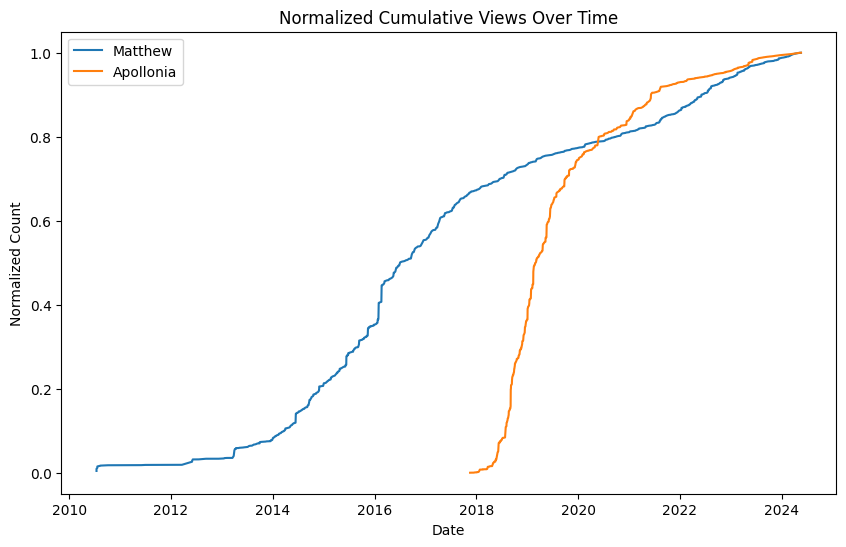


----------------------------------------------
in terms of Likes
----------------------------------------------



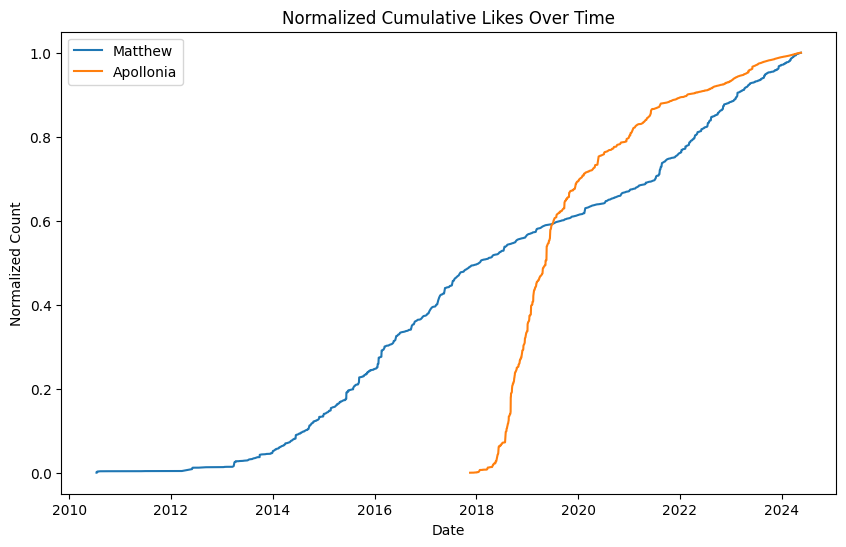

In [80]:
print('Channel Growth over time')
print('----------------------------------------------')
print()
print('in terms of Views')
print('----------------------------------------------')
print()
y_data = 'Views'
label1 = 'Matthew'
label2 = 'Apollonia'
plot_cumulative_data([(mat_df['Date'], mat_df[y_data]), (apo_df['Date'], apo_df[y_data])], labels=[label1, label2])
print()
print('----------------------------------------------')
print('in terms of Likes')
print('----------------------------------------------')
print()
y_data = 'Likes'
label1 = 'Matthew'
label2 = 'Apollonia'
plot_cumulative_data([(mat_df['Date'], mat_df[y_data]), (apo_df['Date'], apo_df[y_data])], labels=[label1, label2])

In [ ]:

# Sort the dataframes by date
mat_df_sorted = mat_df.sort_values(by='Date')
apo_df_sorted = apo_df.sort_values(by='Date')

# Calculate cumulative views and likes
mat_df_sorted['Cumulative_Views'] = mat_df_sorted['Views'].cumsum()
mat_df_sorted['Cumulative_Likes'] = mat_df_sorted['Likes'].cumsum()
apo_df_sorted['Cumulative_Views'] = apo_df_sorted['Views'].cumsum()
apo_df_sorted['Cumulative_Likes'] = apo_df_sorted['Likes'].cumsum()

# Normalize cumulative values to the maximum value of each dataset
mat_df_sorted['Cumulative_Views_Normalized'] = mat_df_sorted['Cumulative_Views'] / mat_df_sorted['Cumulative_Views'].max()
mat_df_sorted['Cumulative_Likes_Normalized'] = mat_df_sorted['Cumulative_Likes'] / mat_df_sorted['Cumulative_Likes'].max()
apo_df_sorted['Cumulative_Views_Normalized'] = apo_df_sorted['Cumulative_Views'] / apo_df_sorted['Cumulative_Views'].max()
apo_df_sorted['Cumulative_Likes_Normalized'] = apo_df_sorted['Cumulative_Likes'] / apo_df_sorted['Cumulative_Likes'].max()

# Create a figure and two subplots
fig = plt.figure(figsize=(12, 10))

# First subplot for Cumulative Views
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(mat_df_sorted['Date'], mat_df_sorted['Cumulative_Views_Normalized'], label='Views', color='blue')
ax1.plot(apo_df_sorted['Date'], apo_df_sorted['Cumulative_Views_Normalized'], label='Views', color='red')
ax1.set_title('Normalized Cumulative Views Over Time')
ax1.set_ylabel('Normalized Count')
ax1.legend()

# Second subplot for Cumulative Likes
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(mat_df_sorted['Date'], mat_df_sorted['Cumulative_Likes_Normalized'], label='Likes', color='blue')
ax2.plot(apo_df_sorted['Date'], apo_df_sorted['Cumulative_Likes_Normalized'], label='Likes', color='red')
ax2.set_title('Normalized Cumulative Likes Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Count')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Numerical values | 'Views', 'Likes', 'TotalDuration'

In [ ]:
# aggreations to be plotted

aggregations = ['sum', 'mean', 'median', 'quantile']

# Plot the values for each DataFrame
fig, axes = plt.subplots(len(aggregations), len(num_col), figsize=(15, 15), sharex=True)

for i, agg_type in enumerate(aggregations):
    for j, col in enumerate(num_col):
        # Plot df1 values
        axes[i, j].bar(0, result_mat.loc[agg_type, col], width=0.1, color='blue', label='Matthew')
        # Plot df2 values
        axes[i, j].bar(0.2, result_apo.loc[agg_type, col], width=0.1, color='blue', label='Apollonia')
        axes[i, j].set_title(f'{agg_type.capitalize()} - {col}')
        axes[i, j].set_xticks([0, 0.2])
        axes[i, j].set_xticklabels(['Matthew', 'Apollonia'])


plt.tight_layout()
plt.show()


# Save data

In [ ]:
'''
data_path = str(print(notebook_path[0:(len(notebook_path)-9)] + str('data')))
csv_file='data_mat.csv'
video_mat.to_csv(data_path,csv_file, index='False', sep=b'\t', encoding='utf-8', header=True)
'''